In [58]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('seaborn-white')

/var/folders/3g/rk1vm9ss45j1wr9sh_2fl08h0000gn/T/ipykernel_76840/2342984217.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [59]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Use K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.)

In [60]:
# prep data
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

K = 2

In [16]:
km1=KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(n_clusters=2, n_init=20)

In [17]:
km1.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [18]:
km1.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [19]:
X['cluster'] = km1.labels_
 # means for full scaled data
display(X.groupby('cluster').mean()) #cluster means


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.887602,-0.72875,0.989993,0.127120,0.233519,-0.177171,-0.247968,0.391692,-0.676331,0.571043,0.290835,0.469937
1,-0.510699,0.41930,-0.569612,-0.073141,-0.134360,0.101939,0.142673,-0.225368,0.389140,-0.328561,-0.167338,-0.270388


K = 4

In [20]:
km2 = KMeans(n_clusters=4, n_init=20)
km2.fit(X)

KMeans(n_clusters=4, n_init=20)

In [21]:
km2.predict(X)

array([2, 1, 2, ..., 2, 2, 2], dtype=int32)

In [22]:
km2.labels_

array([2, 1, 2, ..., 2, 2, 2], dtype=int32)

In [23]:
# Add new labels to original data and explore what clusters mean by evaluating column means.
X['cluster'] = km2.labels_

# means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,0.986387,-0.786057,1.002095,0.059142,-0.083230,-0.426954,-0.502712,0.371764,-0.645923,0.397247,0.448666,0.614302
1,-0.079352,0.064777,0.097970,0.405385,-0.011302,1.072345,1.324844,0.296883,-0.169019,-0.204762,-0.545028,-0.434397
2,-0.630106,0.498730,-0.775410,-0.231308,-0.169230,-0.258302,-0.361380,-0.411976,0.594564,-0.315708,0.013430,-0.177137
3,0.065322,0.010313,1.104160,-0.408285,5.523137,-0.086857,0.500700,0.180551,-1.674547,3.624492,-0.888281,-0.374932


By comparison, K=2 is more meaningful than K=4. Within that context:

# Describe variables that cluster with higher values of wine quality. 
The cluster with higher values of wine quality includes fixed acidity, citric acid, residual sugar,chlorides, density, sulphates, alcohol
Amongst the different variables, there are some variables which deviates more align with good quality(0.469937) feature from its mean, positively across the cluster than other ones, such as sulphates(0.571043), density(0.391692),chlorides(0.233519).


# Describe variables that cluster with lower values of wine quality.
The cluster with lower values of wine quality includes volatile acidity, free sulfur dioxide, total sulfur dioxide, pH, sulphates
Amongst the different variables, there are some variables which deviates more align with bad quality(-0.270388) feature from its mean, negatively across the cluster than other ones, such as sulphates(-0.328561),density(-0.225368) and alcohol(-0.167338).

# If you want to make a good bottle of wine, then what characteristics are most important according to this analysis?

According to the kmeans result, a good bottle of wine should be high on sulphates(since this feature plays a critical role in both good and bad criteria) and high on density(similar reason as the last one).

# 2. Use Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. (Assume all variables are continuous.) Use complete linkage and the same number of groups that you found to be the most meaningful in question 1.

In [31]:
from scipy.spatial.distance import pdist, squareform #import methods from scipy
# 1. Use Condensed distance matrix
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete') # define distance metric and linkage for model

# row_clusters has meta-data we can use to visualize the HC fit with a dendrogram

In [24]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,   # note that we select the clusters
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data

labels

/Users/cyn_chen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [25]:
# Add new labels to original data and explore what clusters mean by evaluating column means.
X['cluster'] = labels

# means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.000094,0.000440,-0.003917,-0.000054,-0.013922,-0.000494,-0.000401,-0.000965,0.003336,-0.007182,0.001203,0.001762
1,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158


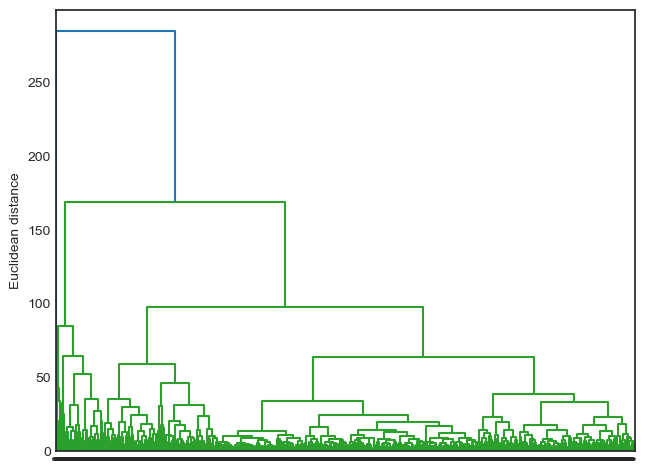

In [32]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters,
                       labels=labels,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300,
#            bbox_inches='tight')
plt.show()

/var/folders/3g/rk1vm9ss45j1wr9sh_2fl08h0000gn/T/ipykernel_76840/1005607424.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_xticklabels([''] + list(df_rowclust.columns))
/var/folders/3g/rk1vm9ss45j1wr9sh_2fl08h0000gn/T/ipykernel_76840/1005607424.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axm.set_yticklabels([''] + list(df_rowclust.index))


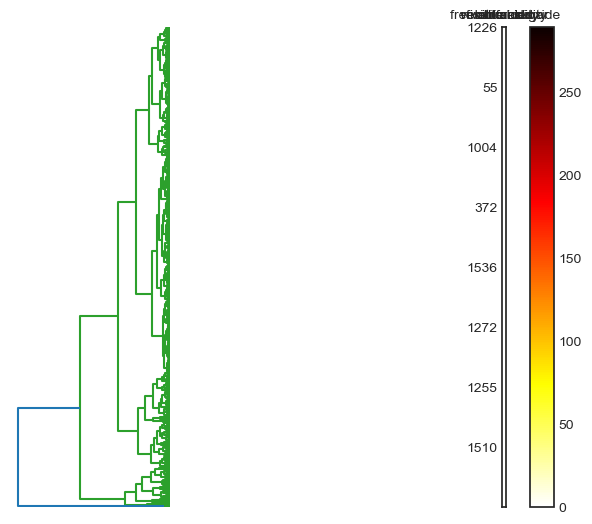

In [33]:
# plot row dendrogram
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# note: for matplotlib < v1.5.1, please use orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reorder data with respect to clustering
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remove axes spines from dendrogram
for i in axd.spines.values():
        i.set_visible(False)

# plot heatmap
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

# plt.savefig('./figures/heatmap.png', dpi=300)
plt.show()

/Users/cyn_chen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cyn_chen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


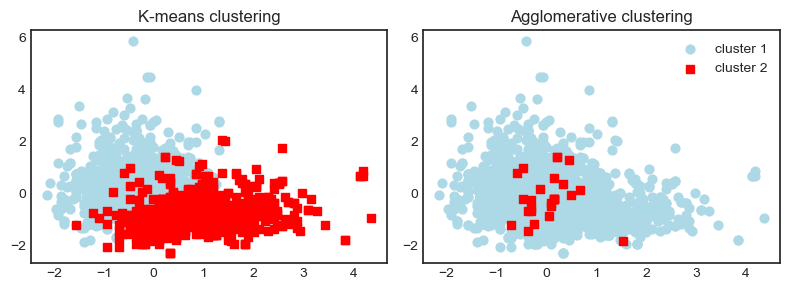

In [52]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

The result from complete linkage method is not very pleasing, therefore, I tried ward linkage method in the following steps.

In [35]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,   # note that we select the clusters
                             affinity='euclidean',
                             linkage='ward')
labels2 = ac.fit_predict(X)    # extract cluster labels for each observation in data

labels2

/Users/cyn_chen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# Add new labels to original data and explore what clusters mean by evaluating column means.
X['cluster'] = labels2

# means for full scaled data
display(X.groupby('cluster').mean()) #cluster means

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,-0.276066,0.131066,-0.253178,-0.038142,-0.099424,0.127593,0.116552,-0.157625,0.193528,-0.133645,-0.050646,-0.112775
1,1.389705,-0.659783,1.274489,0.192005,0.500494,-0.642297,-0.586717,0.793481,-0.974214,0.672761,0.254951,0.567704


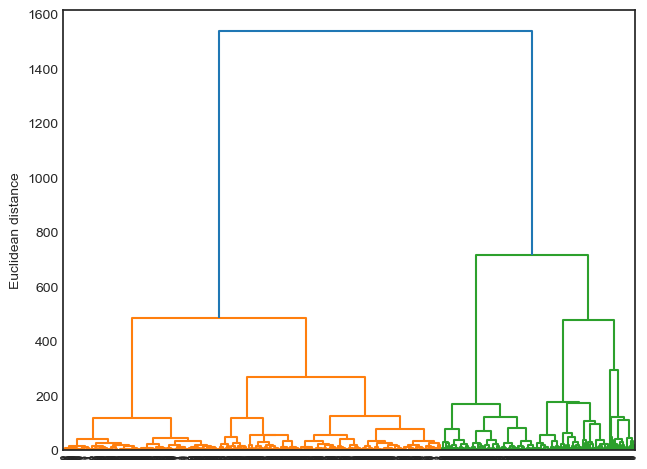

In [40]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
# make dendrogram black (part 1/2)
# from scipy.cluster.hierarchy import set_link_color_palette
# set_link_color_palette(['black'])

row_clusters2 = linkage(pdist(df, metric='euclidean'), method='ward') # define distance metric and linkage for model


row_dendr = dendrogram(row_clusters2,
                       labels=labels2,
                       # make dendrogram black (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
#plt.savefig('./figures/dendrogram.png', dpi=300,
#            bbox_inches='tight')
plt.show()

/Users/cyn_chen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/cyn_chen/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


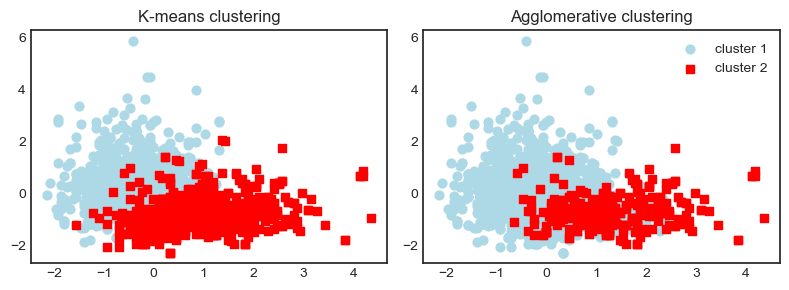

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='ward')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

# Describe variables that cluster with higher values of wine quality. Describe variables that cluster with lower values of wine quality.

The result from hierarchical cluster analysis using complete linkage indicates that only several data points were assigned as cluster 2, whereas the rest of the observations are assigned as cluster 1. Therefore, I tried ward linkage instead and received quite informative results. 

The cluster with higher values of wine quality(0.567704) includes sulphates(0.672761), alcohol(0.254951), density(0.793481), chlorides(0.500494). 

The cluster with lower values of wine quality(-0.112775) includes sulphates(-0.133645),density(-0.157625), citric acid(-0.253178), fixed acidity(-0.276066).

# If you want to make a good bottle of wine, then what characteristics are most important according to this analysis? Have your conclusions changed using Hierarchical clustering rather than k means clustering? Present any figures that assist you in your analysis.

The result indicates that if you want to make a good bottle of wine, high on sulphates, alcohol, density and chlorides are essential; while citric acid and fixed acidity level should be maintained low. The criteria partially aligns with the previous k means result only differed by several new features.

While conducting the analysis, major splits within dendrogram indicates the presence of distinct clusters of red wines that have different chemical properties. Therefore it is meaningful to split the dataset into two clusters.

# 3. Use Principal Components Analysis to reduce the dimensions of your data. 

In [55]:
PCA().fit(X).components_.T

array([[ 0.48489636,  0.00776992, -0.15770267, -0.23200329, -0.0819616 ,
         0.05661449, -0.30605945,  0.19723987, -0.16765149, -0.18346549,
        -0.25582441,  0.29294668,  0.57496968],
       [-0.2657705 ,  0.3278223 , -0.23618393,  0.04282141,  0.30348566,
         0.30214241, -0.62502174,  0.1435647 , -0.05731868,  0.15495149,
         0.37722402,  0.00545003,  0.00155684],
       [ 0.4706409 , -0.12303425,  0.10862427, -0.05753474, -0.12339537,
         0.1345675 ,  0.2451088 ,  0.29571918, -0.2147174 ,  0.34553441,
         0.62511684, -0.10483933, -0.01128316],
       [ 0.13369481,  0.17253763,  0.24207542, -0.3820514 ,  0.70918365,
         0.10485527,  0.2872198 , -0.17352446,  0.27745404, -0.05202423,
         0.08792694,  0.10870452,  0.14837645],
       [ 0.19336726,  0.19366249, -0.02752586,  0.65496516,  0.26464202,
         0.33452354,  0.23403444, -0.18553414, -0.41877711, -0.00430203,
        -0.20813018, -0.01085681,  0.07349593],
       [-0.05540511,  0.263034

In [62]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'], index=X.index)
df_plot

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
1,-1.004185,2.071838,0.007759,0.466119,0.182454,0.657775,-1.376790,-0.176714,0.587342,-0.565736,0.048784,-0.139565
2,-0.915783,1.393434,-0.699286,0.345292,0.095210,0.254823,-0.720338,-0.088687,0.546495,-0.162065,-0.199140,-0.120391
3,2.404077,-0.213792,0.066381,-0.889182,-1.524742,-0.132218,0.200660,-0.202816,-0.506212,0.241135,-0.107616,0.319764
4,-1.779442,1.157303,-1.386581,-0.044944,0.233885,-0.976983,-0.110528,0.040320,-0.294420,0.073112,-0.262937,0.048362
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.241991,0.599594,0.795827,0.441059,-0.312981,0.130820,0.291926,0.137412,-0.421817,-1.016843,0.312767,-0.058920
1595,-2.122456,-0.370101,2.138539,0.454564,0.104124,-0.751228,-0.436849,0.181539,-0.413852,-0.992136,0.465027,-0.240933
1596,-1.366265,-0.517561,1.250696,0.514505,0.195916,-0.552162,-0.196039,-0.121154,-0.107569,-0.752854,0.235266,-0.402292
1597,-2.367147,0.703545,0.899482,0.661956,0.021380,-0.805753,0.126669,0.607400,-0.378298,-0.723453,0.737253,0.036187


In [63]:
pca.explained_variance_

array([3.12312087, 2.24328497, 1.68397283, 1.21578121, 0.97387267,
       0.66300688, 0.61870473, 0.50618912, 0.41156493, 0.3281246 ,
       0.18033141, 0.05955516])

In [65]:
pca.explained_variance_ratio_

array([0.26009731, 0.1868235 , 0.14024331, 0.10125174, 0.0811053 ,
       0.05521602, 0.05152648, 0.04215605, 0.03427563, 0.02732662,
       0.01501822, 0.00495983])

In [68]:
# The loading vectors
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2', 'V3', 'V4','V5','V6','V7','V8','V9','V10','V11','V12'])
pca_loadings

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12
fixed acidity,0.487883,-0.004173,-0.164829,-0.231098,-0.078779,0.055531,-0.307215,0.200529,-0.174578,-0.182956,-0.256438,0.638580
volatile acidity,-0.265129,0.338968,-0.227089,0.041858,0.299379,0.297287,-0.626234,0.146126,-0.060223,0.155106,0.377161,0.004662
citric acid,0.473335,-0.137358,0.100229,-0.056736,-0.120149,0.136633,0.244149,0.296333,-0.220975,0.346086,0.624328,-0.070037
residual sugar,0.139154,0.167736,0.243620,-0.383038,0.709363,0.109311,0.283854,-0.170626,0.278187,-0.052237,0.088078,0.183646
chlorides,0.197427,0.189788,-0.026608,0.654778,0.266237,0.337337,0.230547,-0.186923,-0.419936,-0.003863,-0.208617,0.053931
free sulfur dioxide,-0.045881,0.259483,0.616111,-0.033711,-0.159413,-0.042648,-0.138260,-0.019356,-0.318000,-0.585389,0.237933,-0.051922
total sulfur dioxide,0.004067,0.363971,0.540732,-0.028460,-0.218453,0.115954,-0.110209,0.089897,0.121823,0.589188,-0.355047,0.069793
density,0.370301,0.330781,-0.168723,-0.200693,0.208793,-0.425667,-0.122546,0.079500,-0.249074,0.043538,-0.231453,-0.566645
pH,-0.432721,-0.065440,0.069771,-0.005466,0.257647,-0.480354,0.185692,0.314693,-0.461916,0.207610,-0.005599,0.341230
sulphates,0.254535,-0.109334,0.212913,0.560502,0.214835,-0.403743,-0.233402,0.275492,0.452689,-0.071919,0.097637,0.067793


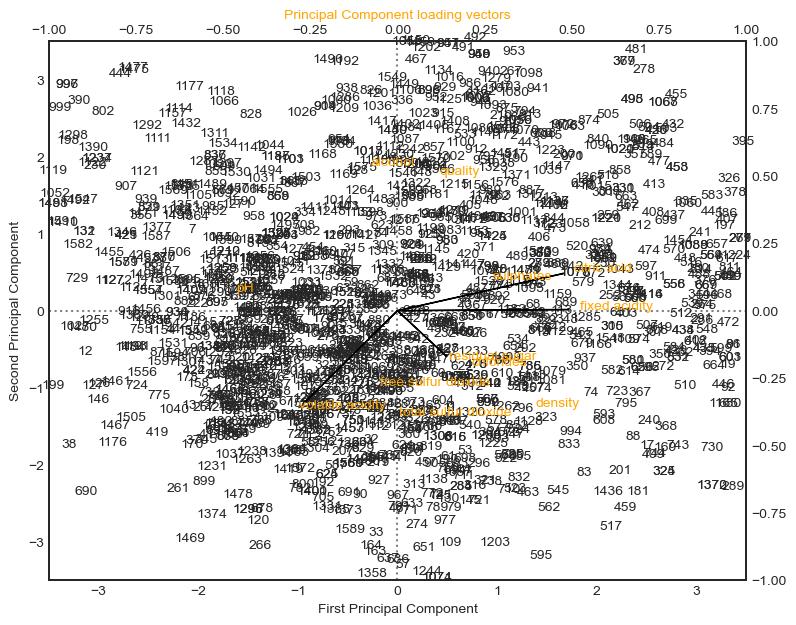

In [70]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')

# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='orange')
ax2.set_xlabel('Principal Component loading vectors', color='orange')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='orange')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

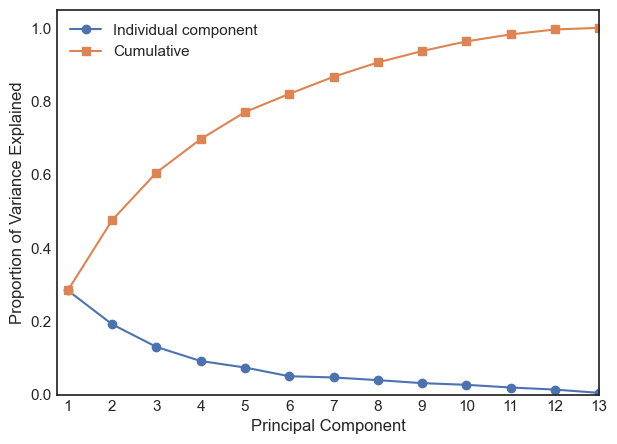

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13])
plt.legend(loc=2);

# How much of the variation in your data is explained by the first two principal components. 

For PC1 and PC2, they each have 0.28 and 0.19 percent of the explained variance ratio. A higher explained variance ratio indicates that the principal component captures a larger proportion of the total variance in the data. In the context of our anaylsis, the sum of first two PCs is 0.47, which represent nearly half of the variance. 

# How might you use the first two components to do supervised learning on some other variable tied to wine (e.g. - wine price)?

In order to do that, I first need to create a new DataFrame containing the first two principal components. Each row in this DataFrame corresponds to a sample in the original dataset. Then I could concatenate the PCA components DataFrame with the variable tied to wine price. This results in a new DataFrame where each row contains the values of the first two principal components and the associated wine price. The following steps would be pretty standard, which include spliting the data into training and testing, choosing the supervised learnig algorithm(regression or classification).The final step would be fiting the data and evaluating model performance.

The success of this approach depends on how well the first two principal components capture the variability in the original features related to wine. If the PCA components effectively summarize the information, the supervised learning model should be able to leverage this reduced-dimensional representation for predicting wine prices.